<a href="https://colab.research.google.com/github/akibkhan1/skin-lesion-classification/blob/main/color_constancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1RBzMmkKmz42L1xZpx4_F0Kwn5MN0Rq8c

Downloading...
From: https://drive.google.com/uc?id=1RBzMmkKmz42L1xZpx4_F0Kwn5MN0Rq8c
To: /content/ISIC2018_Task3_Training_Input.zip
2.77GB [00:41, 66.9MB/s]


In [ ]:
!unzip ISIC2018_Task3_Training_Input.zip

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [9]:
def shade_of_gray_cc(img, power=6, gamma=2.2):
    """
    img (numpy array): the original image with format of (h, w, c)
    power (int): the degree of norm, 6 is used in reference paper
    gamma (float): the value of gamma correction, 2.2 is used in reference paper
    """
    img_dtype = img.dtype

    if gamma is not None:
        img = img.astype('uint8')
        look_up_table = np.ones((256,1), dtype='uint8') * 0
        for i in range(256):
            look_up_table[i][0] = 255 * pow(i/255, 1/gamma)
        img = cv2.LUT(img, look_up_table)

    img = img.astype('float32')
    img_power = np.power(img, power)
    rgb_vec = np.power(np.mean(img_power, (0,1)), 1/power)
    rgb_norm = np.sqrt(np.sum(np.power(rgb_vec, 2.0)))
    rgb_vec = rgb_vec/rgb_norm
    rgb_vec = 1/(rgb_vec*np.sqrt(3))
    img = np.multiply(img, rgb_vec)

    # Andrew Anikin suggestion
    img = np.clip(img, a_min=0, a_max=255)
    
    return img.astype(img_dtype)

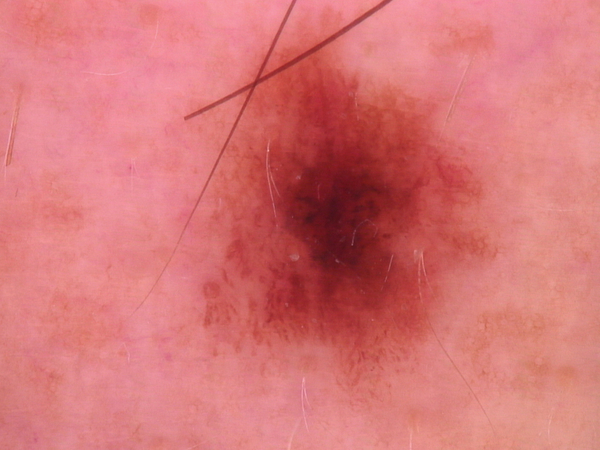

-1

In [8]:
image = cv2.imread('/content/ISIC_0024306.jpg',cv2.IMREAD_COLOR)
image = np.array(image)

cv2_imshow(image)
cv2.waitKey(0)

In [10]:
img_cc = shade_of_gray_cc(image) 

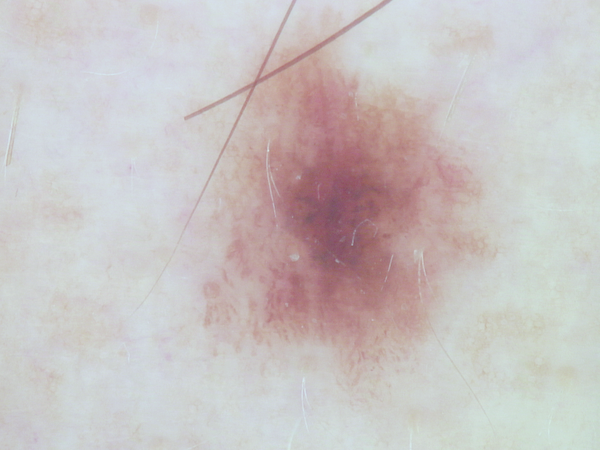

-1

In [11]:
cv2_imshow(img_cc)
cv2.waitKey(0)

In [12]:
def apply_cc (img_paths, output_folder_path, resize=None):
    
    if not os.path.isdir(output_folder_path):
        os.mkdir(output_folder_path)    

    with tqdm(total=len(img_paths), ascii=True, ncols=100) as t:
        
        for img_path in img_paths:
            img_name = img_path.split('/')[-1]
            img_ = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if resize is not None:
                img_ = cv2.resize(img_, resize, cv2.INTER_AREA)
            np_img = shade_of_gray_cc (img_)            
            cv2.imwrite(os.path.join(output_folder_path, img_name.split('.')[0] + '.jpg'), np_img)
            t.update()


In [13]:
img_paths = glob("/content/ISIC2018_Task3_Training_Input/*.jpg")
len(img_paths)

10015

In [14]:
img_paths[0:15]

['/content/ISIC2018_Task3_Training_Input/ISIC_0025034.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0025443.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0030022.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0026381.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0029100.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0025819.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0025896.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0024963.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0026514.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0025737.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0029041.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0029821.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0026582.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0025395.jpg',
 '/content/ISIC2018_Task3_Training_Input/ISIC_0030189.jpg']

In [16]:
apply_cc (img_paths, 'ISIC2018-Task3-CC/', (400,400))

100%|#########################################################| 10015/10015 [04:36<00:00, 36.17it/s]


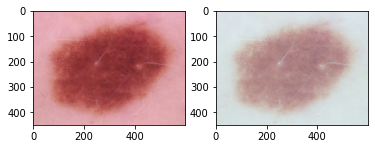

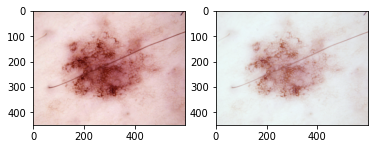

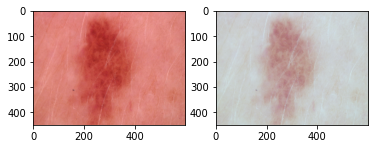

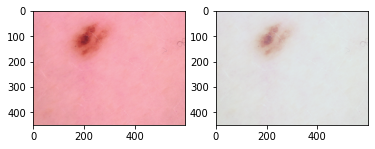

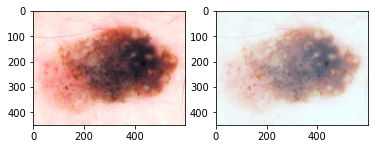

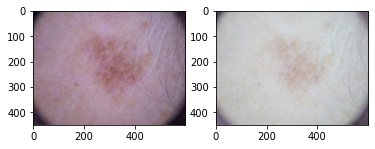

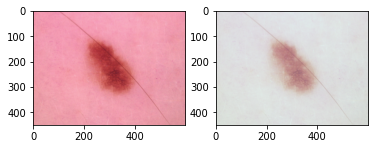

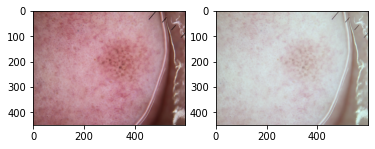

In [17]:
_n_samples = 8

for path in img_paths[0:_n_samples]:
    _img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
    img_cc = shade_of_gray_cc (img)  
    _, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_cc)
    plt.show()

In [ ]:
!zip -r ISIC2018-Task3-CC.zip ISIC2018-Task3-CC

In [23]:
!cp -r ISIC2018-Task3-CC.zip "/content/drive/MyDrive/Colab_Notebooks/rasa-pa-chatbot/"